In [30]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
print(california_housing)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88  \
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

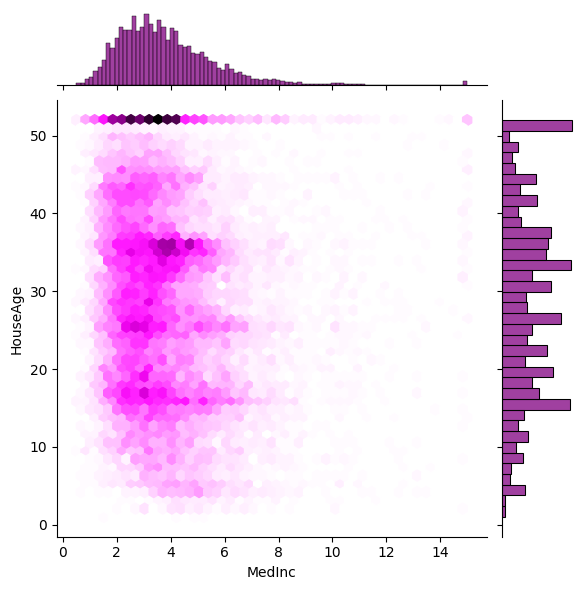

In [31]:
import seaborn as sns

def plot_jointplot(df, x_col, y_col):
    sns.jointplot(data=df, x=x_col, y=y_col, kind='hex', color='purple')
plot_jointplot(california_housing.data, 'MedInc', 'HouseAge')

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup   
0      0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  \
1      0.538027  0.392157  0.038224   0.018929    0.067210  0.001141   
2      0.466028  1.000000  0.052756   0.021940    0.013818  0.001698   
3      0.354699  1.000000  0.035241   0.021929    0.015555  0.001493   
4      0.230776  1.000000  0.038534   0.022166    0.015752  0.001198   
...         ...       ...       ...        ...         ...       ...   
20635  0.073130  0.470588  0.029769   0.023715    0.023599  0.001503   
20636  0.141853  0.333333  0.037344   0.029124    0.009894  0.001956   
20637  0.082764  0.313725  0.030904   0.023323    0.028140  0.001314   
20638  0.094295  0.333333  0.031783   0.024859    0.020684  0.001152   
20639  0.130253  0.294118  0.031252   0.024573    0.038790  0.001549   

       Latitude  Longitude  
0      0.567481   0.211155  
1      0.565356   0.212151  
2      0.564293   0.210159  
3      0.564293   0

<Axes: xlabel='AveRooms', ylabel='Population'>

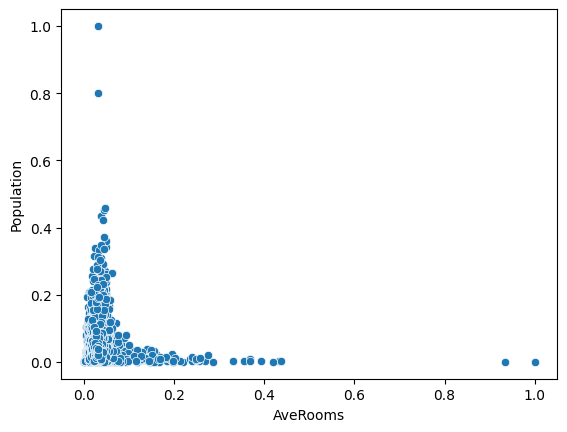

In [32]:
import numpy as np
X = california_housing.data
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)
print(X_norm)
sns.scatterplot(data=X_norm, x='AveRooms', y='Population')

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_prediction = linear_regression.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared error is ", mse)


Mean Squared error is  0.555891598695244


In [34]:
from sklearn.linear_model import RidgeCV

X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

ridge_regression = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5)
ridge_regression.fit(X_train, y_train)

y_prediction = ridge_regression.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared error is ", mse)

Mean Squared error is  0.5550405537343013


In [35]:
from sklearn.linear_model import LassoCV

X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

lasso_regression = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5)
lasso_regression.fit(X_train, y_train)

y_prediction = lasso_regression.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared error is ", mse)

Mean Squared error is  0.5538940157172418
